In [1]:
!wget https://d3ilbtxij3aepc.cloudfront.net/projects/AI-Capstone-Projects/PRAICP-1002-TrafSignDetc.zip

--2021-04-12 07:47:34--  https://d3ilbtxij3aepc.cloudfront.net/projects/AI-Capstone-Projects/PRAICP-1002-TrafSignDetc.zip
Resolving d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)... 13.224.241.130, 13.224.241.224, 13.224.241.201, ...
Connecting to d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)|13.224.241.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 641568792 (612M) [application/x-zip-compressed]
Saving to: ‘PRAICP-1002-TrafSignDetc.zip’

PRAICP-1002-TrafSig 100%[===================>] 611.85M  13.9MB/s    in 45s     

2021-04-12 07:48:20 (13.6 MB/s) - ‘PRAICP-1002-TrafSignDetc.zip’ saved [641568792/641568792]



In [2]:
!unzip /content/PRAICP-1002-TrafSignDetc.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

**Importing Necessary Packages**

In [3]:
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Flatten, Dense, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import PIL
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import random
import cv2
import seaborn as sb
%matplotlib inline

**Validating Train Data**

In [4]:
classes = os.listdir('/content/Train')
num = len(classes)
print(num,'Classes')

43 Classes


In [5]:
train_images = 0
for images in classes:
  train_images += len(os.listdir('/content/Train/{}'.format(images)))
print(train_images,'Train Images')

39209 Train Images


In [6]:
Train_path = os.path.join('/content/Train')

**Validating Test Data**

In [7]:
test_images = os.listdir('/content/Test')
num = len(test_images)
print(num,'Test Images')

12631 Test Images


In [8]:
Test_path = os.path.join('/content/Test')

---

**Loading the data**

In [9]:
batch_size = 32,
img_height = 75,
img_width = 75

In [10]:
datagen = ImageDataGenerator(
    #rotation_range = 360,
    #horizontal_flip = True,
    #vertical_flip = True,
    rescale = 1./255,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #height_shift_range = 0.2,
    #width_shift_range = 0.2,
    validation_split = 0.2
)

In [11]:
train_generator = datagen.flow_from_directory(
    Train_path,
    target_size = (75,75),
    batch_size = 39209,
    class_mode = 'categorical'
)
X,y = train_generator.next()

Found 39209 images belonging to 43 classes.


----

**Visualization**

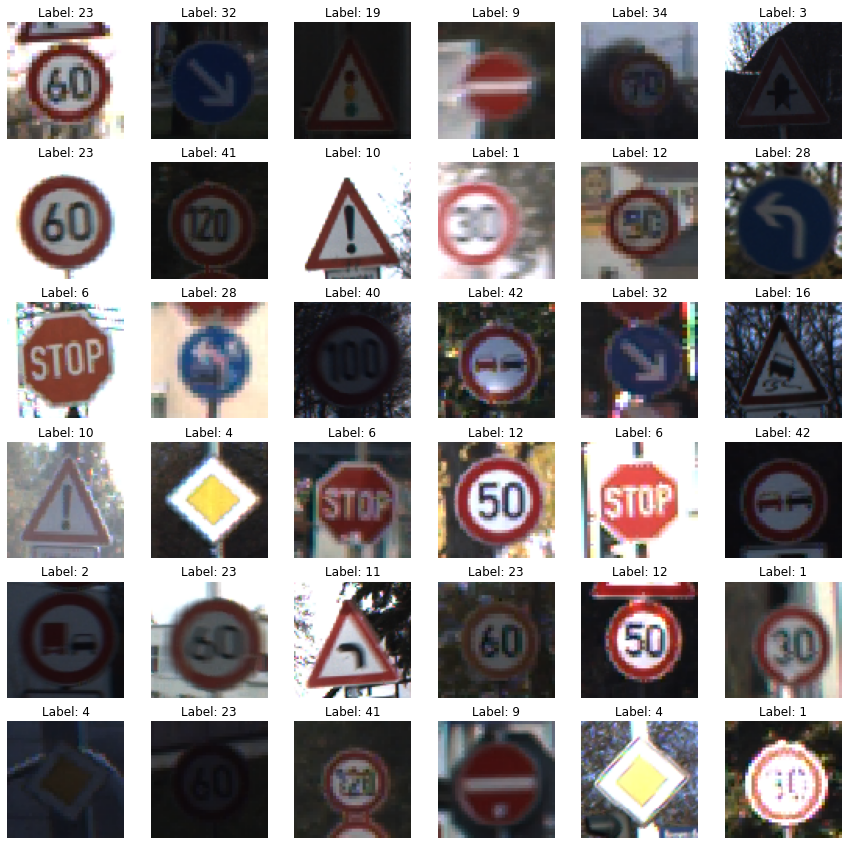

In [12]:
fig, axes = plt.subplots(6,6, figsize=(15,15))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r])
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

**Splitting data into train test split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X.shape

(39209, 75, 75, 3)

In [16]:
y.shape

(39209, 43)

In [17]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(31367, 75, 75, 3)
(7842, 75, 75, 3)
(31367, 43)
(7842, 43)


**Modelling**

In [18]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [19]:
incep = InceptionResNetV2(include_top = False,weights = 'imagenet',input_shape = [75,75,3])

for layer in incep.layers:
  layer.trainable = False

219062272/219055592 [==============================] - 2s 0us/step


In [20]:
incep.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________

In [21]:
model = Sequential()

In [22]:
model.add(incep)
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(43,activation='softmax'))

In [23]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
result = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 500,
    validation_data = (X_val, y_val),
    verbose = 1
)

Epoch 1/20
63/63 [==============================] - 90s 722ms/step - loss: 2.7353 - accuracy: 0.2628 - val_loss: 1.3173 - val_accuracy: 0.5787
Epoch 2/20
63/63 [==============================] - 36s 572ms/step - loss: 1.2394 - accuracy: 0.5988 - val_loss: 0.8326 - val_accuracy: 0.7196
Epoch 3/20
63/63 [==============================] - 36s 575ms/step - loss: 0.8259 - accuracy: 0.7212 - val_loss: 0.6899 - val_accuracy: 0.7734
Epoch 4/20
63/63 [==============================] - 36s 575ms/step - loss: 0.6565 - accuracy: 0.7835 - val_loss: 0.5492 - val_accuracy: 0.8168
Epoch 5/20
63/63 [==============================] - 36s 574ms/step - loss: 0.5146 - accuracy: 0.8308 - val_loss: 0.4796 - val_accuracy: 0.8439
Epoch 6/20
63/63 [==============================] - 36s 575ms/step - loss: 0.4315 - accuracy: 0.8569 - val_loss: 0.4350 - val_accuracy: 0.8600
Epoch 7/20
63/63 [==============================] - 36s 575ms/step - loss: 0.3565 - accuracy: 0.8808 - val_loss: 0.4196 - val_accuracy: 0.8701

In [25]:
r = result.history

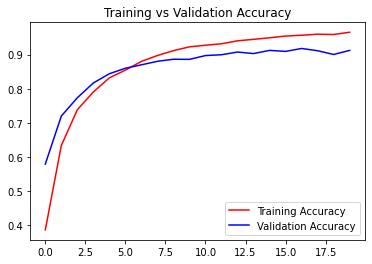

In [26]:
plt.plot(r['accuracy'],'r',label = 'Training Accuracy')
plt.plot(r['val_accuracy'],'b',label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

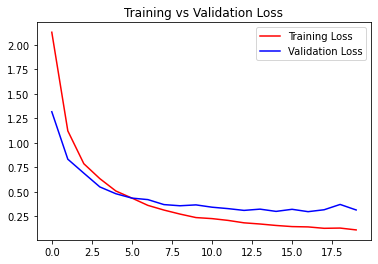

In [27]:
plt.plot(r['loss'],'r',label = 'Training Loss')
plt.plot(r['val_loss'],'b',label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [28]:
print("Accuracy =",round(max(r['accuracy']),2))
print("Validation accuracy =",round(max(r['val_accuracy']),2))

Accuracy = 0.97
Validation accuracy = 0.92


**Check our model with some random input images**

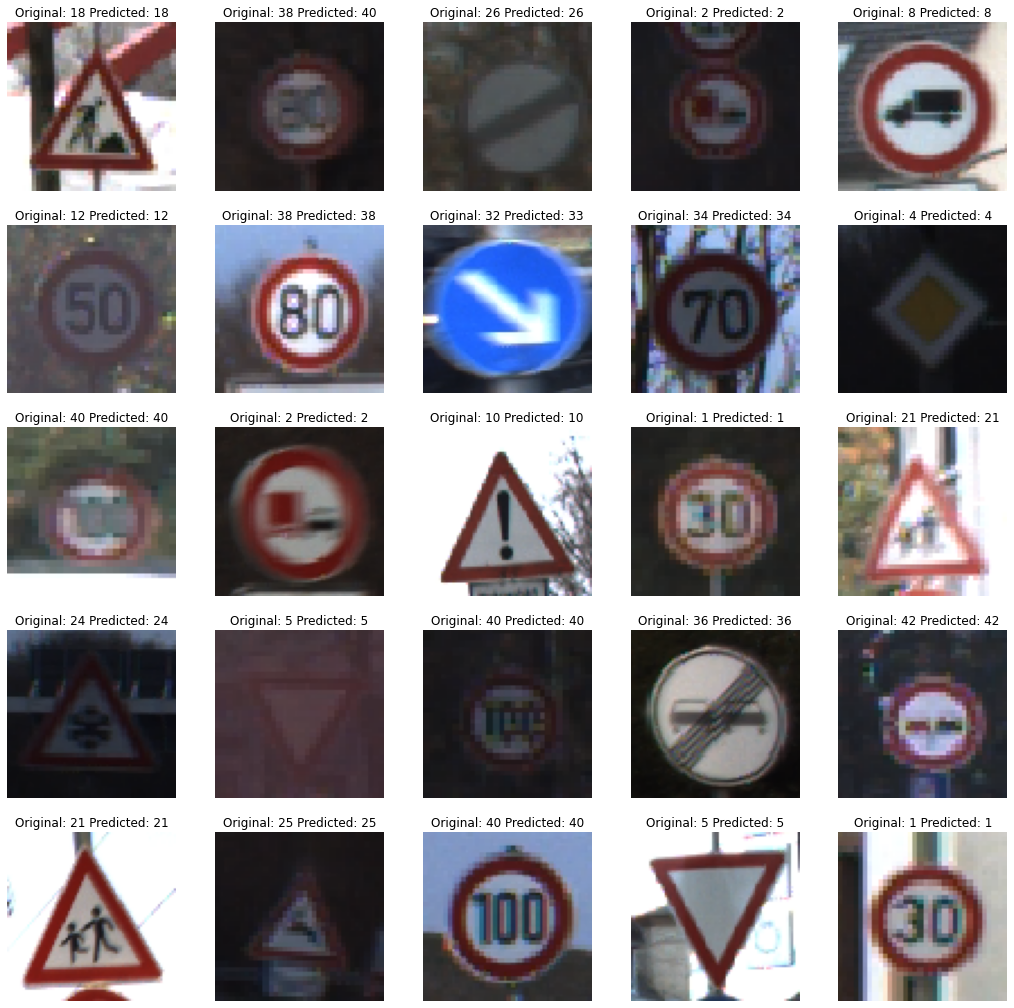

In [29]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_val.shape[0])
    ax.imshow(X_val[r])
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_val[r]), np.argmax(model.predict(X_val[r].reshape(1, 75, 75, 3)))))